# Classification using MNIST dataset

In [1]:
## Get the data using sklearn's tool

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [17]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

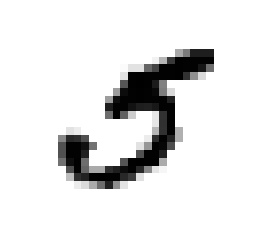

In [19]:
## Let's take a look at some of these images just to get a better idea of the dataset
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

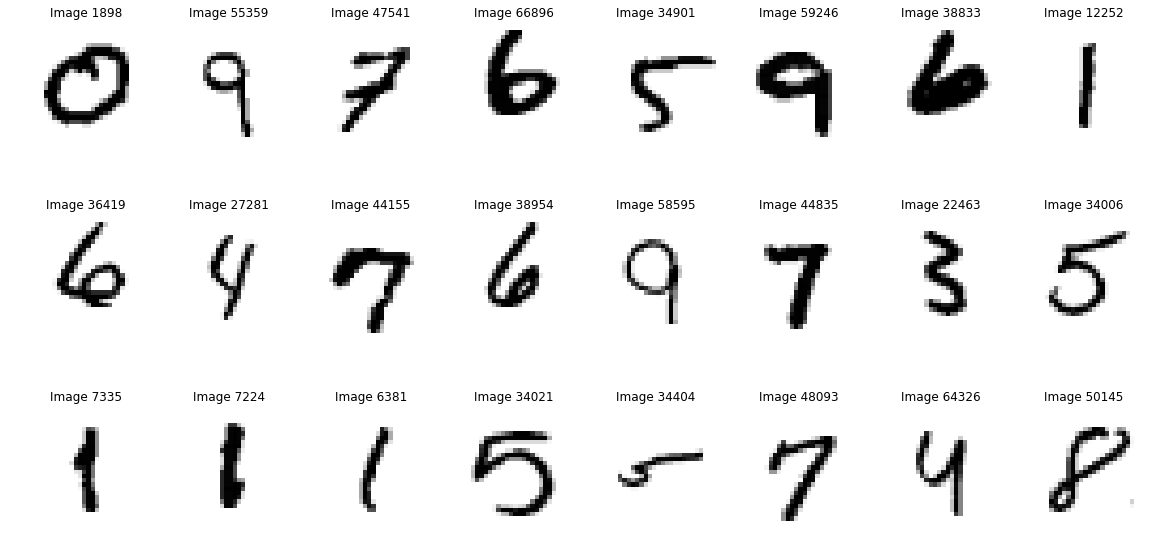

In [21]:
import numpy as np
import random

## A function to plot images
def plot_digit(image):
    ## 784 array into 28x28 matrix
    img = image.reshape(28,28)
    
    plt.subplot(3,8,i+1)
    plt.imshow(img,cmap = matplotlib.cm.binary,interpolation='nearest')
    plt.title('Image %s' % index)
    plt.axis("off")    

## Make a nice 8x3 grid
plt.figure(figsize=(20, 10))

for i in range(0,24):
    # Get a random image
    index = random.randint(0,len(X))
    img = X[index]
    plot_digit(img)
    
plt.show()

In [29]:
## The MNIST data set is already broken into 60000 training images and 10000 test
X_train, X_test, y_train, y_test = mnist.data[:60000], mnist.data[60000:], mnist.target[:60000], mnist.target[60000:]

## Re-shuffle the training data in case the numbers are ordered
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Start with a Binary Classifier

Simplify the problem, only identify if digit is a 5 or not

In [30]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### Specifically with a Stochastic Gradient Descent classifier

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

#### That's it! Now test it
The 36000-th entry is a five. Check on that

In [32]:
## A five
sgd_clf.predict([mnist.data[36000]])

array([ True])

In [33]:
## Not a five
sgd_clf.predict([mnist.data[2000]])

array([False])

### Better, yet use the `cross_validation` package

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf,X_train,y_train_5,scoring='accuracy',cv=3)

In [35]:
print scores

[0.96075 0.9672  0.96415]


### Actually, let's check how many fives are there in the dataset

In [36]:
fives = (y_train == 5)
print "Only %s entries of the %s in the dataset are fives!" % (fives.sum(), len(y_train))

Only 5421 entries of the 60000 in the dataset are fives!


In [37]:
for x in range(0,10):
    y_train_x = (y_train == x)
    print "%s entries of the %s in the dataset are %s" % (y_train_x.sum(), len(y_train),x)


5923 entries of the 60000 in the dataset are 0
6742 entries of the 60000 in the dataset are 1
5958 entries of the 60000 in the dataset are 2
6131 entries of the 60000 in the dataset are 3
5842 entries of the 60000 in the dataset are 4
5421 entries of the 60000 in the dataset are 5
5918 entries of the 60000 in the dataset are 6
6265 entries of the 60000 in the dataset are 7
5851 entries of the 60000 in the dataset are 8
5949 entries of the 60000 in the dataset are 9


(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

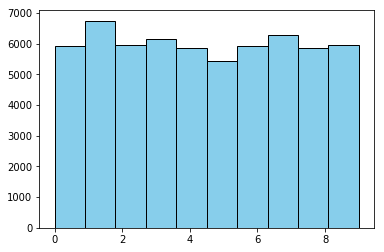

In [38]:
plt.hist(y_train,bins=10,color = "skyblue", ec="k")

(array([54579.,  5421.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

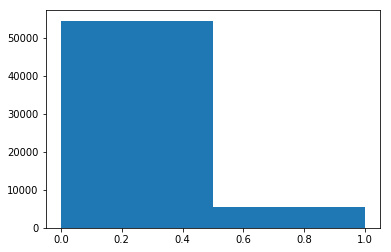

In [39]:
plt.hist(y_train_5,bins=2)

#### This is clearly a skewed dataset. Guessing that an imagine is *not* a 5 will be right **90%** of the time!

## Confusion matrix
Count the number of instances of class A that are classified as class B, e.g., an imaged of 5 confused as a 3.

Use `cross_val_predict` to perform k-fold cross-validation and get a set of predictions

In [40]:
from sklearn.model_selection import cross_val_predict, cross_val_score

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5,cv=10)
y_train_scores = cross_val_score(sgd_clf, X_train, y_train_5,cv=10)

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53785,   794],
       [ 1531,  3890]])

### Interpretation of the confusion matrix

* 53421 True negatives (non-5s correctly classified as non-5s)
* 1158 False positives (non-5s incorrectly classified as 5s)
* 1176 False negatives (5s incorrectly classified as non-5s)
* 4245 True positives (5s correctly classified as 5s)

There a few important quantities derived from these numbers. **Precision**:

$$\textrm{Precision} = \frac{\textrm{True Positives}}{\textrm{True Positives + False Positives}}$$

And **Recall**,

$$\textrm{Recall} = \frac{\textrm{True Positives}}{\textrm{True Positives + False Negatives}}$$

Let's use scikit-learn's tools to caclulate these

In [42]:
from sklearn.metrics import precision_score, recall_score
print "Precision: %s" % precision_score(y_train_5,y_train_pred)
print "Recall: %s" % recall_score(y_train_5,y_train_pred)

Precision: 0.8304867634500427
Recall: 0.7175797823279838


Only 83% of the identified 5s are actually 5s. Moreover, only 71% of the 5s are identified.

### The F1-score

Harmonic mean of precision and recall

$$ F_1 = \frac{2}{\frac{1}{\textrm{Precision}}+\frac{1}{\textrm{Recall}}}$$

In [43]:
from sklearn.metrics import f1_score
print "The F-1 score is: %s " % f1_score(y_train_5,y_train_pred)

The F-1 score is: 0.7699158832261256 


Let's investigate the precision/recall tradeoff using the `decision_function` method of the `SGDClassifier` class to play with the threshold for the classifier. The default threshold value is `0.0`

In [44]:
y_scores = sgd_clf.decision_function([mnist.data[36000]])
print y_scores
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print y_some_digit_pred

[82120.00727229]
[ True]


In [45]:
sgd_clf.predict([mnist.data[36000]])

array([ True])

To select the threshold we use the `cross_val_predict` but ask for the `decision_function` scores instead of the actual predictions

In [46]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

With these values we can calculate predictions for any possible threshold value usinf the `precision_recall_curve` function

In [47]:
from sklearn.metrics import precision_recall_curve

precision, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

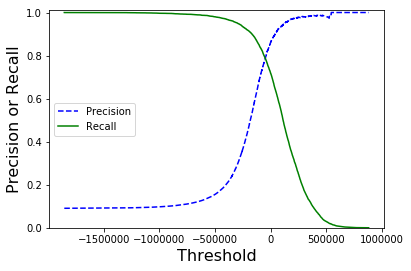

In [48]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label='Precision')
    plt.plot(thresholds,recalls[:-1],"g-",label='Recall')
    plt.xlabel('Threshold',fontsize=16)
    plt.ylabel('Precision or Recall',fontsize=16)
    plt.ylim([0,1.01])
    plt.legend(loc= 'center left')
    
plot_precision_recall_vs_threshold(precision,recalls,thresholds)
plt.show()

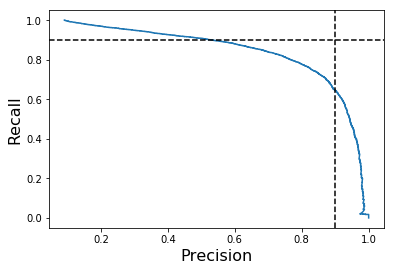

In [49]:
plt.plot(precision[:-1],recalls[:-1],"-")
plt.xlabel('Precision',fontsize=16)
plt.ylabel('Recall',fontsize=16)
plt.axvline(x=0.9, color='black', linestyle='--')
plt.axhline(y=0.9, color='black', linestyle='--')
plt.show()

In [50]:
## For a classifier with ~90% precision, from the first plot, we need a 70000 threshold
y_train_pred_90 = (y_scores > 70000)
print precision_score(y_train_5,y_train_pred_90)

0.9256776450014573


## The ROC Curve
(Receiver operating characteristic) plots true positives rate agains the false positive rate (or 1 - specificity)

$$\textrm{Specificity} = \frac{\textrm{True Negatives}}{\textrm{True Negatives + False Positives}}$$

In [51]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

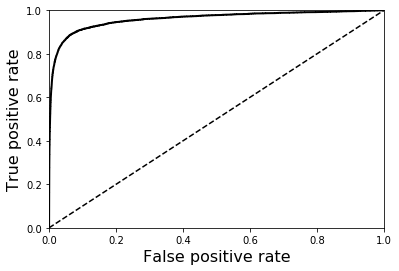

In [52]:
def plot_roc_curve(fpr,tpr,label=None,color=None):
    plt.plot(fpr,tpr,color=color,linewidth=2,label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.axis([0,1,0,1])
    plt.xlabel('False positive rate',fontsize=16)
    plt.ylabel('True positive rate',fontsize=16)
    
plot_roc_curve(fpr,tpr,color='k')
plt.show()

In [53]:
## The "area under the curve" (AUC) is a measure of how good the classifier is
## A value of 1.0 would mean a perfect classifier

from sklearn.metrics import roc_auc_score

print 'The AUC is: %s' % roc_auc_score(y_train_5,y_scores)

The AUC is: 0.9603268815970989


## Compare to a `RandomForestClassifier`
It has the `predict_proba` function instead of the `decision_function`

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(rf_clf,X_train,y_train_5,cv=3,method='predict_proba')

In [55]:
y_scores_forest = y_probas_forest[:,1]
print y_scores_forest

[0.  0.1 0.2 ... 0.  0.5 0. ]


In [56]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

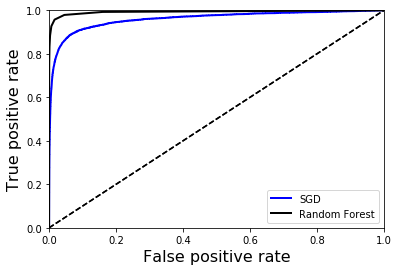

In [57]:
plot_roc_curve(fpr,tpr, label='SGD',color='b')
plot_roc_curve(fpr_forest,tpr_forest,label='Random Forest',color='k')
plt.legend(loc='lower right')
plt.show()

Much better!!! Now the AUC, precision, and recall scores. Need the predictions for that!

In [58]:
y_train_pred_forest = cross_val_predict(rf_clf, X_train, y_train_5,cv=10)

print 'The AUC is: %s' % roc_auc_score(y_train_5,y_scores_forest)
print "Precision: %s" % precision_score(y_train_5,y_train_pred_forest)
print "Recall: %s" % recall_score(y_train_5,y_train_pred_forest)

The AUC is: 0.9929258441802005
Precision: 0.9861800906931548
Recall: 0.8424644899465044


## Multiclass Classification

### Could do one-versus-all (OvA, a binary classifier for each class) or one-versus-one (OvO, a binary classifier for each pair of classes)

#### The default in scikit-learn is OvA

In [33]:
## Train the SDGClassifier using the full target data set (not the one where its only 5s and non 5s)
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([mnist.data[36000]])

array([3.])

It correctly identified the image as a 5!

The `decicion_function` method shows the result of the 10 binary classifiers and why 5 was chosen

In [34]:
some_digit_scores = sgd_clf.decision_function([mnist.data[36000]])
print some_digit_scores
print "The max is %s" % np.argmax(some_digit_scores)

[[-143841.79514695 -393774.14636785 -371439.64318192   34767.47755273
  -350624.06285201  -40200.95429629 -850883.06532842 -435562.35504144
  -669335.31393422 -608524.73560102]]
The max is 3


Similarly, for the random forest case:

In [35]:
rf_clf.fit(X_train,y_train)
rf_clf.predict([mnist.data[36000]])

array([5.])

and the list of probabilities that show why 5 was chosen

In [36]:
rf_clf.predict_proba([mnist.data[36000]])

array([[0.1, 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. ]])

Evaluate the classifier using `cross_val_score()`:

In [37]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.87677465, 0.86059303, 0.87538131])

#### Scaling the variables takes the accuracy from 85% to 90%

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [39]:
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.91121776, 0.90939547, 0.91003651])

## Error Analysis
Start by looking at the confusion matrix just as before

In [40]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5737,    2,   18,   10,   11,   49,   42,    8,   42,    4],
       [   1, 6480,   45,   25,    6,   41,    7,   11,  114,   12],
       [  55,   36, 5318,   94,   85,   29,   88,   60,  177,   16],
       [  47,   42,  140, 5332,    2,  240,   34,   53,  146,   95],
       [  19,   26,   37,    6, 5375,   11,   54,   30,   79,  205],
       [  74,   41,   32,  179,   78, 4618,  102,   31,  170,   96],
       [  29,   26,   45,    2,   39,  100, 5622,    4,   51,    0],
       [  22,   20,   70,   26,   55,   11,    5, 5816,   18,  222],
       [  51,  152,   61,  152,   15,  156,   57,   27, 5031,  149],
       [  41,   30,   28,   91,  165,   27,    3,  197,   83, 5284]])

<function matplotlib.pyplot.show>

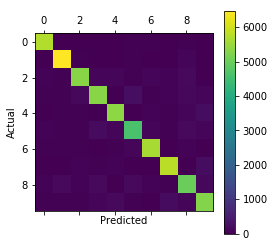

In [41]:
## Plot the matrix using matshow
plt.matshow(conf_mx)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.show

Looks fairly good (diagonal). 5 is greener.

Some of these clases may be less populated. To look at fractional errors, let's divide by the number images in each corresponding class

In [42]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
print row_sums.astype(np.float64)
norm_conf_mx = conf_mx.astype(np.float64) / row_sums
print norm_conf_mx

[[5923.]
 [6742.]
 [5958.]
 [6131.]
 [5842.]
 [5421.]
 [5918.]
 [6265.]
 [5851.]
 [5949.]]
[[9.68596995e-01 3.37666723e-04 3.03900051e-03 1.68833361e-03
  1.85716698e-03 8.27283471e-03 7.09100118e-03 1.35066689e-03
  7.09100118e-03 6.75333446e-04]
 [1.48323939e-04 9.61139128e-01 6.67457728e-03 3.70809849e-03
  8.89943637e-04 6.08128152e-03 1.03826758e-03 1.63156333e-03
  1.69089291e-02 1.77988727e-03]
 [9.23128567e-03 6.04229607e-03 8.92581403e-01 1.57771064e-02
  1.42665324e-02 4.86740517e-03 1.47700571e-02 1.00704935e-02
  2.97079557e-02 2.68546492e-03]
 [7.66595988e-03 6.85043223e-03 2.28347741e-02 8.69678682e-01
  3.26211059e-04 3.91453270e-02 5.54558800e-03 8.64459305e-03
  2.38134073e-02 1.54950253e-02]
 [3.25231085e-03 4.45053064e-03 6.33344745e-03 1.02704553e-03
  9.20061623e-01 1.88291681e-03 9.24340979e-03 5.13522766e-03
  1.35227662e-02 3.50907224e-02]
 [1.36506180e-02 7.56318023e-03 5.90296993e-03 3.30197381e-02
  1.43884892e-02 8.51872348e-01 1.88157167e-02 5.71850212e-03


<function matplotlib.pyplot.show>

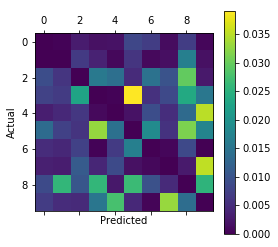

In [43]:
## Fill diagonal with 0s to make the off-diagonal elements easier to see
np.fill_diagonal(norm_conf_mx,0)

## Print normalized matrix
plt.matshow(norm_conf_mx)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.show

#### Looks like 3s and 5s are often confused, and 8s and 9s are generally misclassifed as any other number

For example, let's plot examples of 3s and 5s

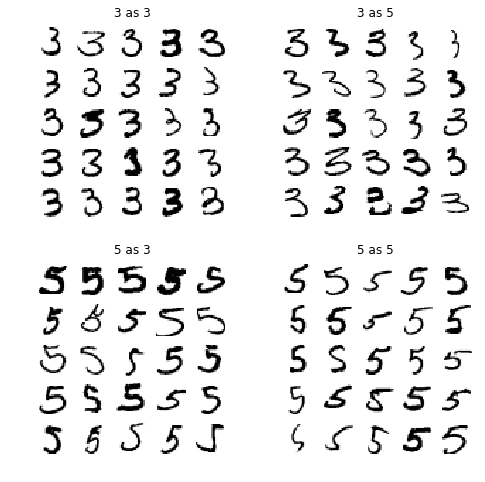

In [44]:
cl_a, cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

# EXTRA
def plot_digits(instances, images_per_row=10, thistitle='title', **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.title(thistitle)
    plt.axis("off")

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25],images_per_row = 5, thistitle = '3 as 3')
plt.subplot(222); plot_digits(X_ab[:25],images_per_row = 5, thistitle = '3 as 5')
plt.subplot(223); plot_digits(X_ba[:25],images_per_row = 5, thistitle = '5 as 3')
plt.subplot(224); plot_digits(X_bb[:25],images_per_row = 5, thistitle = '5 as 5')

plt.show()

## Multilabel Classification
The classifier outputs multiple classes for each instance

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Indicate if digit is larger than 8
y_train_large = (y_train >= 7)
# Indicate if digit is odd
y_train_odd = (y_train % 2 == 1)

# Merge the two into a single array with pairs
y_multilabel = np.c_[y_train_large,y_train_odd]

## Train the model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
## Test prediction on the usual '5' digit
knn_clf.predict([mnist.data[36000]])

array([[False,  True]])

In [61]:
## Evaluate the average F1-score between the output labels
## Note: this takes hours to run
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel,cv=3)

NameError: name 'y_multibale' is not defined

In [65]:
f1_score(y_multilabel, y_train_knn_pred, average='macro')
## Better to do a weighted average
#f1_score(y_multilabel, y_train_knn_pred, average='weighted')

0.9771287725755787

## Multiouput Classification
Each label can be multiclass (more than one value)

Goal: Build a system that removes noise from images. Take noisy MNIST digit and output a clean digit image.

The output is multilabel: one label per pixel and each label can have multiple values (pixel value ranging from 0 to 255)

In [ ]:
## Create sets by adding noise to the MNIST images
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise

noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise

## Targets are now the original images
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
## Draw sample clean and noisy digits
some_index = 5550
def plot_digit_2(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
plot_digit_2(X_train[some_index])

In [ ]:
plot_digit_2(X_train_mod[some_index])

In [ ]:
## Train the classifier (KNeighborsClassifier again)
knn_clf.fit(X_train_mod, y_train_mod)

In [ ]:
## Test the output
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit_2(clean_digit)

In [ ]:
## This is how the noisy image looked: It worked!
plot_digit_2(X_test_mod[some_index])